# Name: A.H.N.KARTHIK
# Reg. No: BL.EN.U4AIE21012

In [1]:
import numpy as np
import librosa
import pandas as pd
import IPython.display as Audio
import matplotlib.pyplot as plt

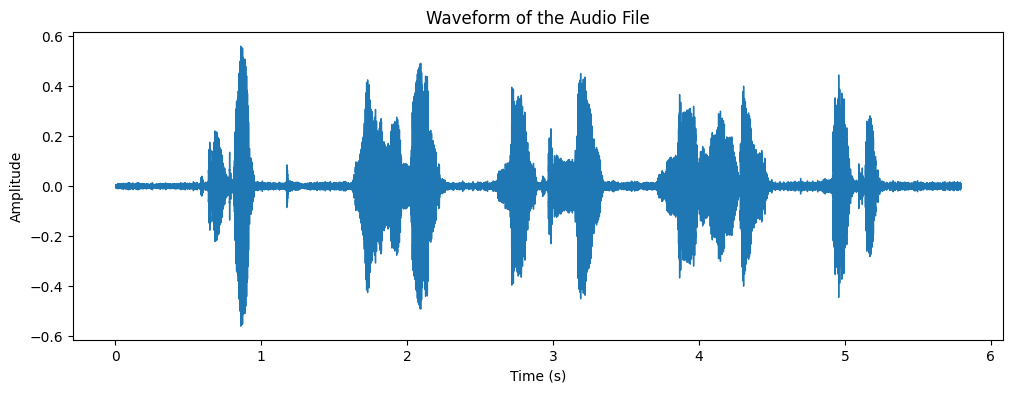

In [6]:
y,sr = librosa.load('/content/Lab5__karthik.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y,sr=sr)
plt.title("Waveform of the Audio File")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

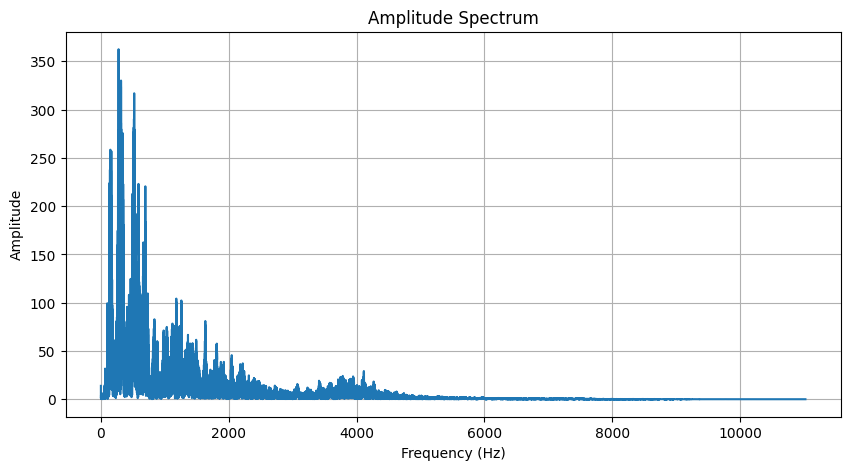

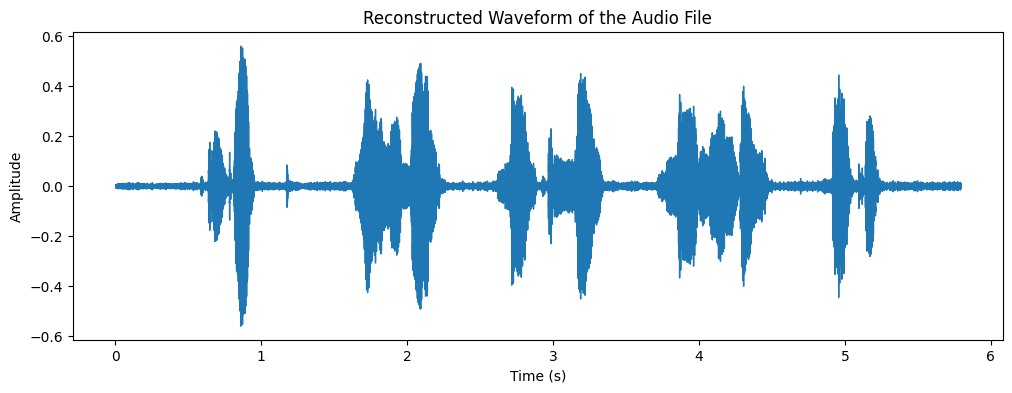

In [7]:
frequency_spectrum = np.fft.fft(y)

plt.figure(figsize=(10, 5))
frequencies = np.fft.fftfreq(len(frequency_spectrum), 1 / sr)
plt.plot(frequencies[:len(frequency_spectrum)//2], np.abs(frequency_spectrum)[:len(frequency_spectrum)//2])
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

reconstructed_signal = np.fft.ifft(frequency_spectrum)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(reconstructed_signal.real, sr=sr)
plt.title("Reconstructed Waveform of the Audio File")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

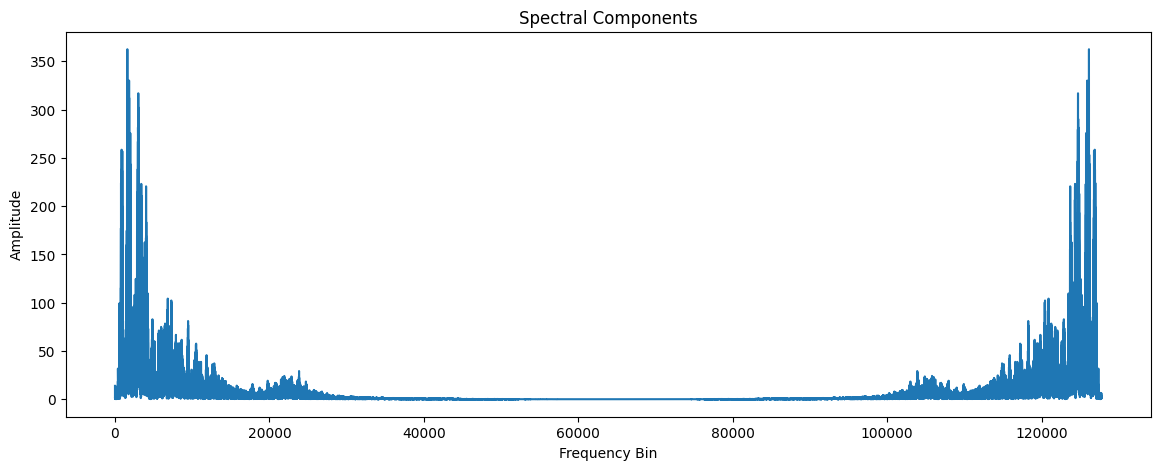

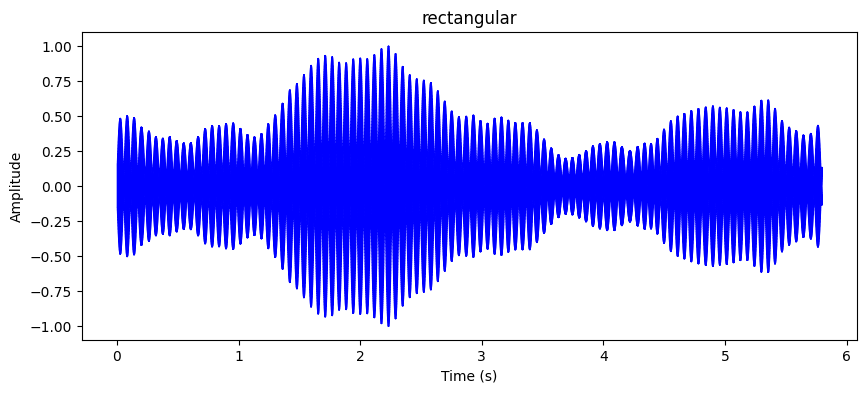

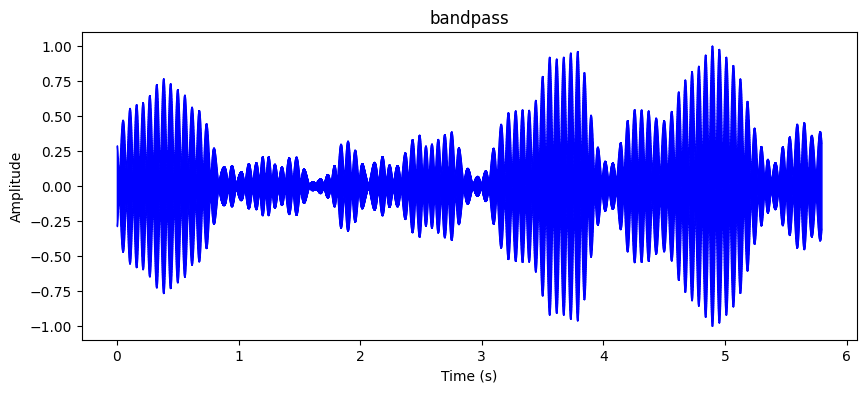

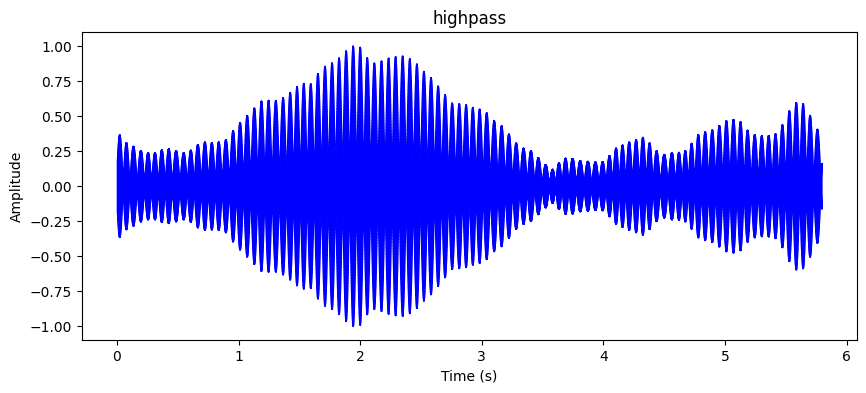

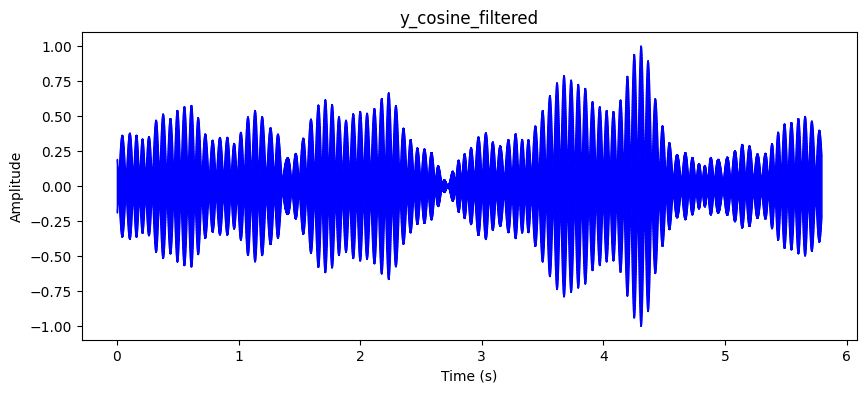

<ipython-input-8-cdf336dd99b2>:82: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  window = signal.gaussian(100, std=5)


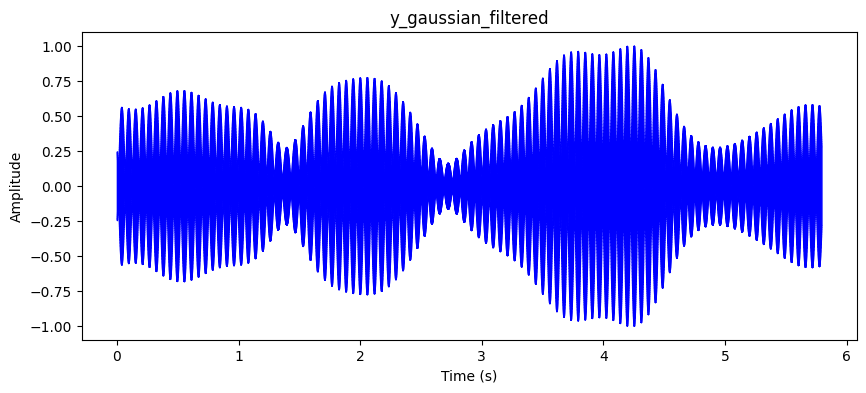

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy import signal
import soundfile as sf

def plot_spectral_components(y, sr):

    D = np.fft.fft(y)

    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D))
    plt.title('Spectral Components')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Amplitude')
    plt.show()

def plot_waveform(y, sr,title):
    """Plot the waveform of the audio signal."""
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, color='blue')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def apply_filter_and_listen(y, sr, filter_type):

    D = np.fft.fft(y)


    if filter_type == 'rectangular':

        cutoff = 2000  # Cutoff frequency in Hz
        order = 101    # Filter order (odd number to avoid Nyquist issue)
        b = signal.firwin(order, cutoff, fs=sr, pass_zero=False, scale=False)

    elif filter_type == 'bandpass':

        lowcut = 1000
        highcut = 4000
        order = 101
        b = signal.firwin(order, [lowcut, highcut], fs=sr, pass_zero=False, scale=False)

    elif filter_type == 'highpass':

        cutoff = 3000
        order = 100
        b = signal.firwin(order + 1, cutoff, fs=sr, pass_zero=False, scale=False)  # Increase order by 1


    b_padded = np.pad(b, (0, len(D) - len(b)), mode='constant')


    D_filtered = D * b_padded

    y_filtered = np.fft.ifft(D_filtered).real

    y_filtered /= np.max(np.abs(y_filtered))

    plot_waveform(y_filtered,sr,filter_type)
    sf.write(f"filtered_{filter_type}.wav", y_filtered, sr)


def apply_other_filters_and_listen(y, sr):
    b_cosine = signal.firwin(100, cutoff=2000, fs=sr, pass_zero=True, window='cosine')

    b_cosine_padded = np.pad(b_cosine, (0, len(y) - len(b_cosine)), mode='constant')

    D_cosine_filtered = np.fft.fft(y) * b_cosine_padded

    y_cosine_filtered = np.fft.ifft(D_cosine_filtered).real

    y_cosine_filtered /= np.max(np.abs(y_cosine_filtered))

    plot_waveform(y_cosine_filtered,sr,'y_cosine_filtered')
    sf.write("filtered_cosine.wav", y_cosine_filtered, sr)




    window = signal.gaussian(100, std=5)
    b_gaussian = signal.firwin(100, cutoff=2000, fs=sr, pass_zero=True)
    b_gaussian *= window
    b_gaussian_padded = np.pad(b_gaussian, (0, len(y) - len(b_gaussian)), mode='constant')
    D_gaussian_filtered = np.fft.fft(y) * b_gaussian_padded
    y_gaussian_filtered = np.fft.ifft(D_gaussian_filtered).real
    y_gaussian_filtered /= np.max(np.abs(y_gaussian_filtered))

    plot_waveform(y_gaussian_filtered,sr,"y_gaussian_filtered")
    sf.write("filtered_gaussian.wav", y_gaussian_filtered, sr)




y, sr = librosa.load('/content/Lab5__karthik.wav')



plot_spectral_components(y, sr)
filter_types = ['rectangular', 'bandpass', 'highpass']
for filter_type in filter_types:
    apply_filter_and_listen(y, sr, filter_type)
apply_other_filters_and_listen(y, sr)